In [649]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

data = pd.read_csv('flight.csv')
df = data.copy()
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
61218,155,12/29/2010,11/20/2013,Female,4,NaN,beijing,CN,32.0,3/31/2014,3,854,0.0,1120.0,1947,3/9/2014,23,55.000000,103,0,0.533333,854,0
43203,1587,10/31/2011,7/16/2013,Female,4,dongguan,guangdong,CN,36.0,3/31/2014,2,3694,0.0,3000.0,4300,7/19/2013,257,3.000000,3,0,0.920000,5694,2
12059,53743,10/11/2007,10/11/2007,Male,4,jiedong,guangdong,CN,49.0,3/31/2014,24,15867,4010.0,6624.0,30144,2/23/2014,38,28.826087,142,0,0.631291,16367,1
35566,8249,3/1/2011,12/22/2011,Male,4,wulumuqi,xinjiang,CN,37.0,3/31/2014,4,3943,0.0,4637.0,9087,12/21/2013,102,75.333333,201,0,0.632781,3943,0
26595,2700,9/5/2007,9/5/2007,Female,4,guangzhou,guangdong,CN,39.0,3/31/2014,8,7551,2210.0,5793.0,13100,12/25/2013,98,53.857143,249,0,0.673034,10051,1


# Exploratory Data Analysis (EDA)

### Check Null Value, Missing Value, and Data Types

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [651]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

**The following feature has a missing value on it:**
1. GENDER
2. WORK_CITY
3. WORK_PROVINCE
4. WORK_COUNTRY
5. AGE
6. SUM_YR_1
7. SUM_YR_2

**Also, the date time features like FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, and LAST_FLIGHT_DATE is not on the proper types as well**

### Check Duplicate Values

In [652]:
df.duplicated().sum()

0

**No duplicate values found on the dataset**

### Descriptive Analysis

In [653]:
numericals = ['AGE', 'FFP_TIER', 'EXCHANGE_COUNT','FLIGHT_COUNT', 'BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL', 'MAX_INTERVAL','avg_discount','Points_Sum','Point_NotFlight']
categoricals = ['FFP_DATE','GENDER','FIRST_FLIGHT_DATE','WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE']

#LOAD_TIME only contain one value

In [654]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Almost all the features are having a quite major of the gap between min and max OR Q3 and max (outliers indications), except for the following features:**
1. FFP_TIER
2. EXCHANGE_COUNT
3. avg_discount

In [655]:
df[categoricals].describe()

,FFP_DATE,GENDER,FIRST_FLIGHT_DATE,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62988,62985,62988,59740,62962,62988
unique,3068,2,3406,1165,118,731
top,1/13/2011,Male,2/16/2013,guangdong,CN,3/31/2014
freq,184,48134,96,17509,57748,959


### Univariate Analysis

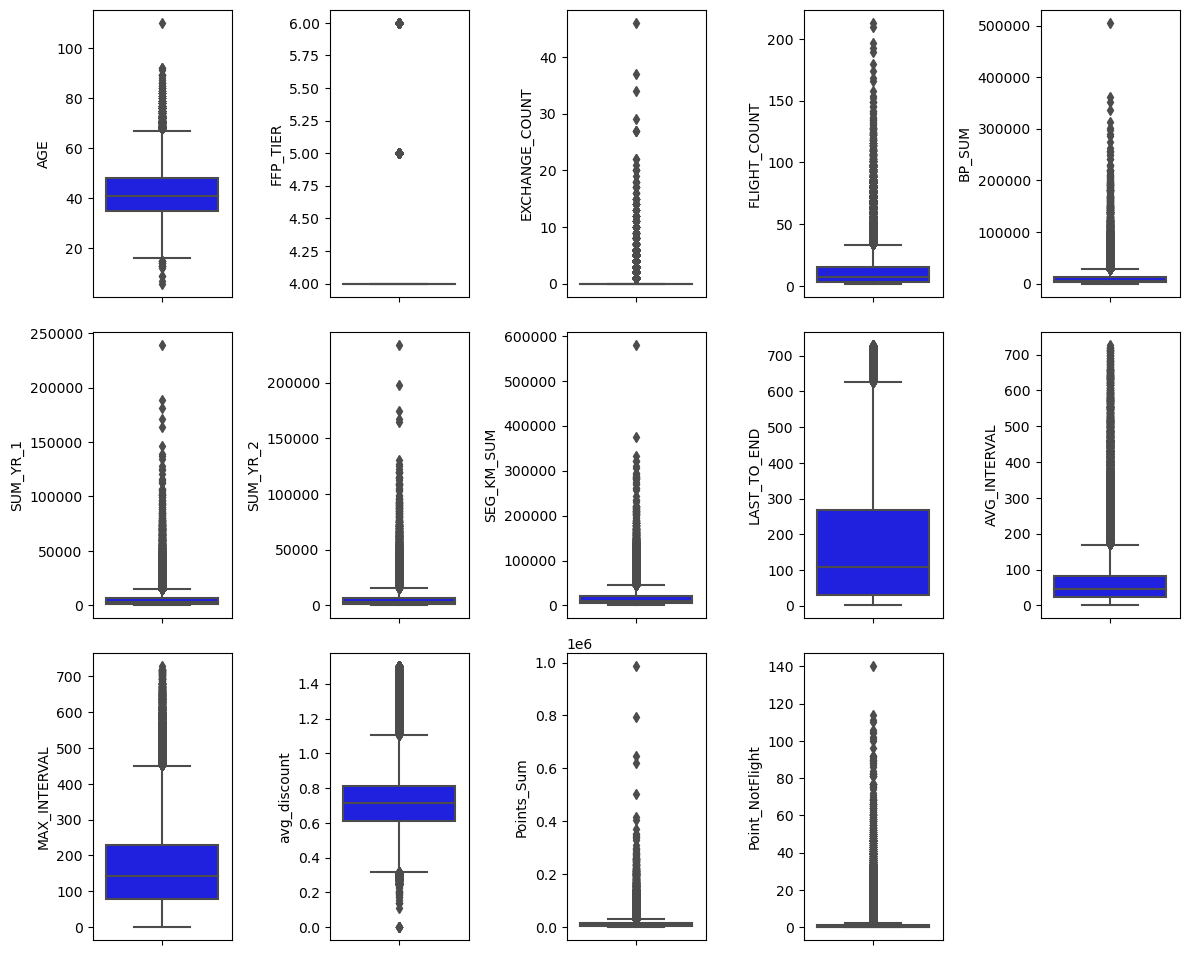

In [656]:
plt.figure(figsize=(12,45))
for i in range(0, len(numericals)):
    plt.subplot(len(numericals), 5,i+1)
    sns.boxplot(y=df[numericals[i]], color='blue', orient='v')
    plt.tight_layout()

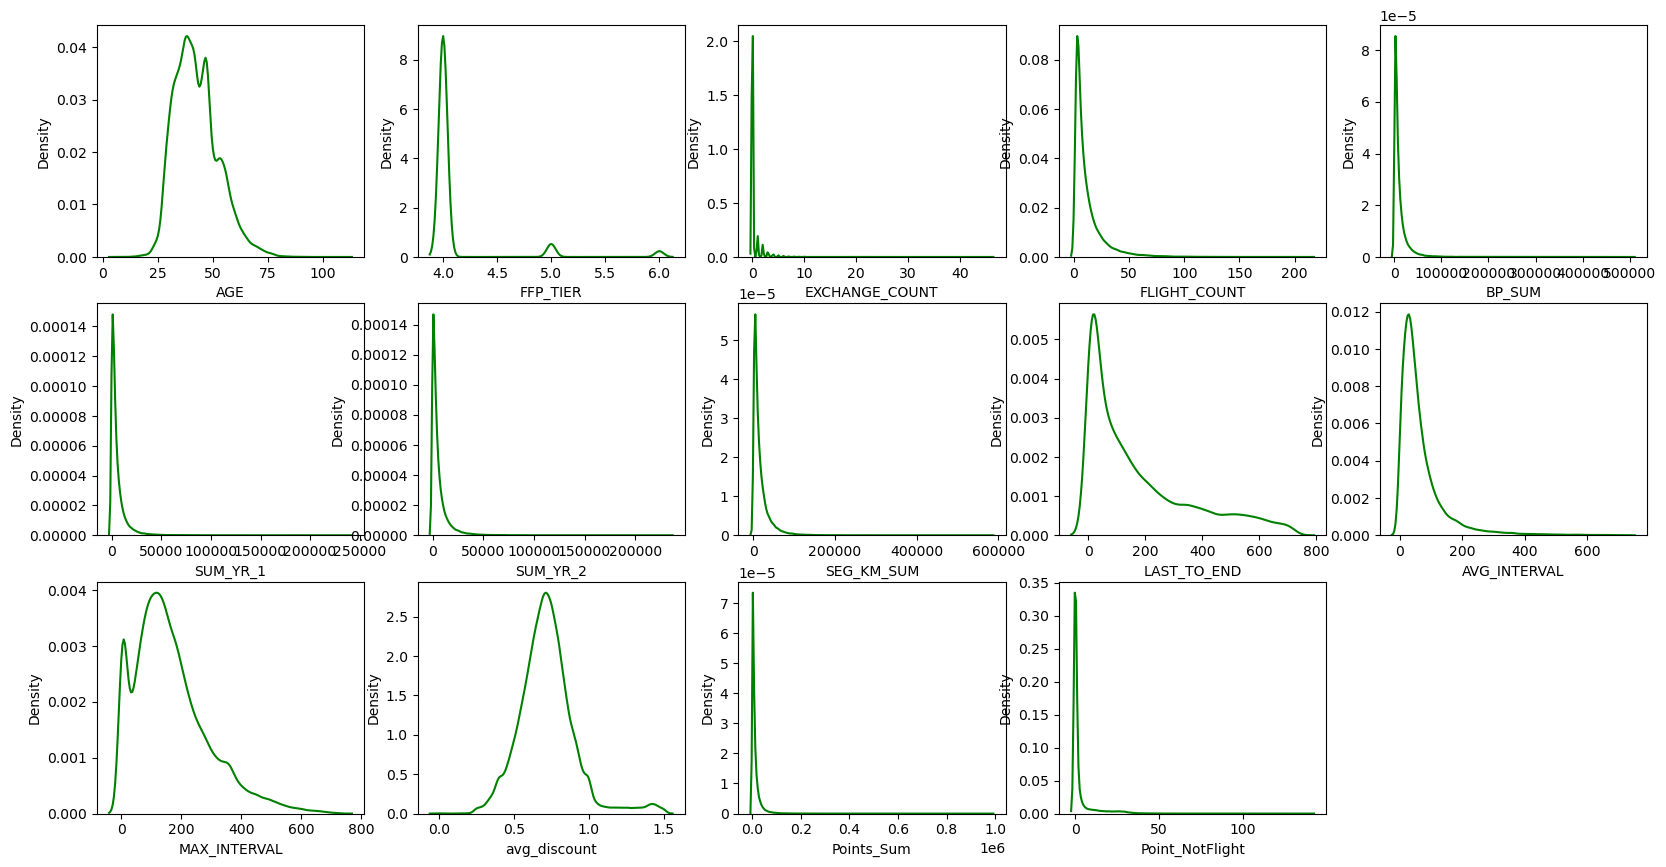

In [657]:
plt.figure(figsize=(20,50))
for i in range(len(numericals)):
    plt.subplot(len(numericals), 5, i+1)
    sns.kdeplot(x=df[numericals[i]], color='green')

**The only feature with normal distribution is AGE**

### Multivariate Analysis

<AxesSubplot:>

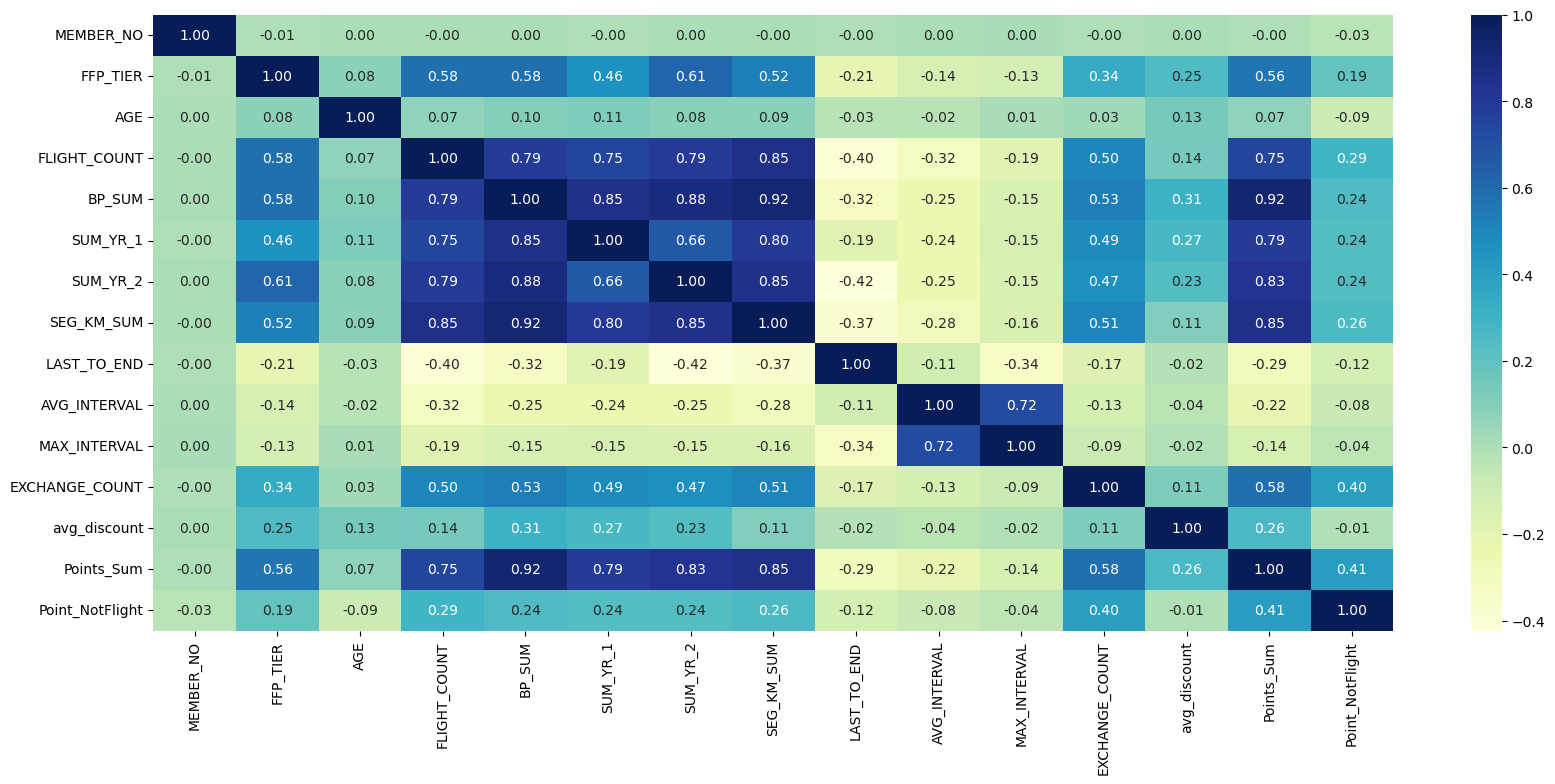

In [658]:
corr = df.corr(method='pearson')

plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')

In [659]:
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7: # jika korelasi lebih besar dari 0.7
            print(f"{corr.columns[i]} and {corr.columns[j]} have a correlation of \033[1m{corr.iloc[i, j]:.2f}\033[0m")
            high_corr.append((corr.columns[i], corr.columns[j]))

print(f"Features with High Correlation: {high_corr}")

BP_SUM and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_1 and FLIGHT_COUNT have a correlation of 0.75
SUM_YR_1 and BP_SUM have a correlation of 0.85
SUM_YR_2 and FLIGHT_COUNT have a correlation of 0.79
SUM_YR_2 and BP_SUM have a correlation of 0.88
SEG_KM_SUM and FLIGHT_COUNT have a correlation of 0.85
SEG_KM_SUM and BP_SUM have a correlation of 0.92
SEG_KM_SUM and SUM_YR_1 have a correlation of 0.80
SEG_KM_SUM and SUM_YR_2 have a correlation of 0.85
MAX_INTERVAL and AVG_INTERVAL have a correlation of 0.72
Points_Sum and FLIGHT_COUNT have a correlation of 0.75
Points_Sum and BP_SUM have a correlation of 0.92
Points_Sum and SUM_YR_1 have a correlation of 0.79
Points_Sum and SUM_YR_2 have a correlation of 0.83
Points_Sum and SEG_KM_SUM have a correlation of 0.85
Features with High Correlation: [('BP_SUM', 'FLIGHT_COUNT'), ('SUM_YR_1', 'FLIGHT_COUNT'), ('SUM_YR_1', 'BP_SUM'), ('SUM_YR_2', 'FLIGHT_COUNT'), ('SUM_YR_2', 'BP_SUM'), ('SEG_KM_SUM', 'FLIGHT_COUNT'), ('SEG_KM_SUM', 'BP_SUM'), 

**Based on the multivariate analysis above, there are some features with the high correlation scores with the other feature. Meaning, there are a redundant possibility among those features. Thus, it needs further analysis to determine whether one of the features should be deleted or not**

# Data Preprocessing

### Handling Missing Value

In [660]:
df.dropna(inplace=True)

In [661]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

**Because the missing value is around 5%, it still safe to be deleted from the dataset**

In [662]:
#Deleting Member ID Column
df = df.drop(columns=['MEMBER_NO'])

In [663]:
df.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
13790,3/4/2012,3/4/2012,Female,4,AUSTRALA,AUSTRALA,AU,47.0,3/31/2014,3,9045,9200.0,0.0,22814,9/28/2012,551,45.500000,78,0,0.750000,9045,0
46629,12/22/2012,12/22/2012,Male,4,guangzhou,guangdong,CN,58.0,3/31/2014,3,3171,3380.0,0.0,4118,2/15/2013,411,27.500000,52,0,0.808936,3171,0
3709,9/23/2007,12/26/2007,Male,5,shenzhen,guangdong,CN,39.0,3/31/2014,58,36558,6471.0,33267.0,51704,3/31/2014,1,10.614035,62,3,0.769833,40916,4
3653,11/27/2007,11/27/2007,Male,4,wulumuqishi,xinjiang,CN,42.0,3/31/2014,20,36968,14914.0,14916.0,51900,1/25/2014,67,34.000000,334,1,0.772626,40439,3
56468,12/13/2010,2/21/2013,Male,4,guangzhou,guangdong,CN,38.0,3/31/2014,3,1526,1593.0,0.0,4807,3/15/2013,383,11.000000,16,0,0.372758,6235,30


### Handling Incorrect Data Types

In [664]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

### Encode All Categoricals Value

In [665]:
from sklearn.preprocessing import LabelEncoder

cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']
encoder = LabelEncoder()
for i in cats:
    df[i] = encoder.fit_transform(df[i])

In [666]:
df.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
39243,2009-10-16,2010-03-30,0,4,2105,939,21,37.0,2014-03-31,6,4652,0.0,2968.0,6812,2013-12-14,109,31.800000,108,0,0.708034,4652,0
9931,2009-12-25,2010-01-23,1,5,2436,875,21,52.0,2014-03-31,40,21622,18301.0,9369.0,31789,2014-03-03,29,17.948718,132,5,0.694208,22122,6
58021,2008-07-02,2013-11-21,1,4,1826,875,21,46.0,2014-03-31,2,0,0.0,1360.0,3934,2013-11-25,128,4.000000,4,0,0.400000,0,0
62506,2012-03-14,2012-03-14,1,5,2436,875,21,43.0,2014-03-31,2,1000,0.0,1208.0,760,2014-03-25,7,1.000000,1,0,0.915000,1000,0
10431,2012-10-19,2012-10-19,1,4,1553,977,21,40.0,2014-03-31,28,20652,6798.0,11871.0,27372,2014-03-28,4,19.481481,106,0,0.778797,20981,0


### Removing Outliers

In [667]:
def remove_outliers(column):
    for col in column:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1-(1.5*IQR)
        high_limit = Q3+(1.5*IQR)
        filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit))
    
    return df[filtered_entries]

In [668]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           58255 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 2   GENDER             58255 non-null  int32         
 3   FFP_TIER           58255 non-null  int64         
 4   WORK_CITY          58255 non-null  int32         
 5   WORK_PROVINCE      58255 non-null  int32         
 6   WORK_COUNTRY       58255 non-null  int32         
 7   AGE                58255 non-null  float64       
 8   LOAD_TIME          58255 non-null  datetime64[ns]
 9   FLIGHT_COUNT       58255 non-null  int64         
 10  BP_SUM             58255 non-null  int64         
 11  SUM_YR_1           58255 non-null  float64       
 12  SUM_YR_2           58255 non-null  float64       
 13  SEG_KM_SUM         58255 non-null  int64         
 14  LAST_F

In [669]:
df = remove_outliers(df.columns)

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47506 entries, 43 to 62986
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           47506 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  47506 non-null  datetime64[ns]
 2   GENDER             47506 non-null  int32         
 3   FFP_TIER           47506 non-null  int64         
 4   WORK_CITY          47506 non-null  int32         
 5   WORK_PROVINCE      47506 non-null  int32         
 6   WORK_COUNTRY       47506 non-null  int32         
 7   AGE                47506 non-null  float64       
 8   LOAD_TIME          47506 non-null  datetime64[ns]
 9   FLIGHT_COUNT       47506 non-null  int64         
 10  BP_SUM             47506 non-null  int64         
 11  SUM_YR_1           47506 non-null  float64       
 12  SUM_YR_2           47506 non-null  float64       
 13  SEG_KM_SUM         47506 non-null  int64         
 14  LAST_

In [671]:
#Drop Missing Value After Removing Outliers
df.dropna(inplace=True)

### Data Extraction - Date Time

In [672]:
#dow: day_of_week
df['dow_ffp_date'] = df['FFP_DATE'].dt.dayofweek
df['dow_first_flight_date'] = df['FIRST_FLIGHT_DATE'].dt.dayofweek
df['dow_load_date'] = df['LOAD_TIME'].dt.dayofweek
df['dow_last_flight_date'] = df['LAST_FLIGHT_DATE'].dt.dayofweek

In [673]:
df = df.drop(columns=['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE'])
df.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,dow_ffp_date,dow_first_flight_date,dow_load_date,dow_last_flight_date
47354,1,4,1431,268,39,33.0,2,1596,2130.0,0.0,4268,449,5.00,5,0,0.750000,1596,0,3,3,0,1
51535,1,4,2460,963,21,48.0,2,1674,1040.0,1139.0,4639,35,422.00,422,0,0.543283,1674,0,6,0,0,2
24941,0,4,2460,963,21,40.0,3,9571,0.0,10215.0,8187,73,12.00,20,0,1.167450,9571,0,4,3,0,6
46978,1,4,2422,1029,21,53.0,5,2151,1246.0,1514.0,5147,34,124.75,309,0,0.634451,2151,0,6,1,0,3
22194,1,4,2461,964,21,40.0,11,9915,1290.0,4474.0,15110,112,56.80,400,0,0.726283,9915,0,6,1,0,2


### Data Transform

In [674]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_std = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)

In [675]:
X_std.sample(5)

,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,dow_ffp_date,dow_first_flight_date,dow_load_date,dow_last_flight_date
32495,-1.777403,-0.206556,-0.562607,0.434108,-0.21144,-0.962246,-0.584576,-0.490693,-0.682354,-0.286881,-0.686900,-0.955424,1.698938,3.558103,-0.256803,1.224661,-0.491646,-0.439368,-0.478071,0.021441,0.0,1.478421
19540,0.562619,-0.206556,0.761412,0.737329,-0.21144,-0.358893,0.040663,-0.282673,-0.606729,-0.352191,-0.045477,-0.804243,-0.186624,-0.013803,2.669918,-0.634553,-0.293021,1.404939,0.554495,0.021441,0.0,-1.496555
29327,0.562619,-0.206556,0.840536,0.010562,-0.21144,-0.962246,-0.480369,-0.388693,-0.458504,-0.303209,-0.505256,-0.896031,0.333531,1.155618,-0.256803,-0.168739,-0.394252,-0.439368,0.554495,0.528916,0.0,-0.504896
24972,0.562619,-0.206556,-0.741957,-0.287846,-0.21144,0.143900,-0.480369,-0.356334,-0.571941,-0.505942,-0.391170,0.000254,0.657245,0.105526,-0.256803,-0.051987,-0.363355,-0.439368,-1.510636,-1.500983,0.0,0.982592
1808,0.562619,-0.206556,0.752620,-0.061634,-0.21144,-0.560011,1.395348,1.428523,1.388827,1.913760,2.503924,-0.825840,-0.613275,-0.578625,-0.256803,-0.137099,1.340887,-0.439368,1.587060,0.021441,0.0,0.486762


### Dimensional Reduction

In [676]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)

feature_importances = np.abs(pca.components_)[0]
indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[indices]
sorted_features = X_std.columns[indices]
print(sorted_features)

Index(['BP_SUM', 'Points_Sum', 'SEG_KM_SUM', 'FLIGHT_COUNT', 'SUM_YR_2',
       'SUM_YR_1', 'FFP_TIER', 'Point_NotFlight', 'LAST_TO_END',
       'EXCHANGE_COUNT', 'AVG_INTERVAL', 'avg_discount', 'AGE', 'MAX_INTERVAL',
       'GENDER', 'WORK_CITY', 'WORK_COUNTRY', 'dow_last_flight_date',
       'dow_ffp_date', 'WORK_PROVINCE', 'dow_first_flight_date',
       'dow_load_date'],
      dtype='object')


**Based on the correlation analysis before and the Feature Importance analysis, therefore, the following features will be deleted due to redundant value:**
1. FLIGHT_COUNT
2. BP_SUM
3. SUM_YR_1
4. SUM_YR_2
5. SEG_KM_SUM
6. MAX_INTERVAL

In [677]:
X_std = X_std.drop(columns=['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','MAX_INTERVAL'])

In [678]:
pcs = PCA(n_components=4).fit_transform(X_std)
pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4'])

In [679]:
pdf.describe()

,pc1,pc2,pc3,pc4
count,4.719400e+04,4.719400e+04,4.719400e+04,4.719400e+04
mean,-1.319555e-15,-3.785001e-17,-6.666184e-17,5.356566e-16
std,1.500607e+00,1.405089e+00,1.188304e+00,1.143069e+00
min,-2.901608e+00,-2.988224e+00,-2.653626e+00,-6.118443e+00
25%,-9.019673e-01,-8.244063e-01,-8.114380e-01,-5.546754e-01
50%,-3.965028e-01,-2.337831e-01,1.734598e-02,1.202725e-01
75%,3.586274e-01,2.912531e-01,8.126275e-01,6.479848e-01
max,1.634688e+01,8.463635e+00,3.212679e+00,6.235953e+00


# Model Fitting (K-Means)

### Identify the optimal number of cluster

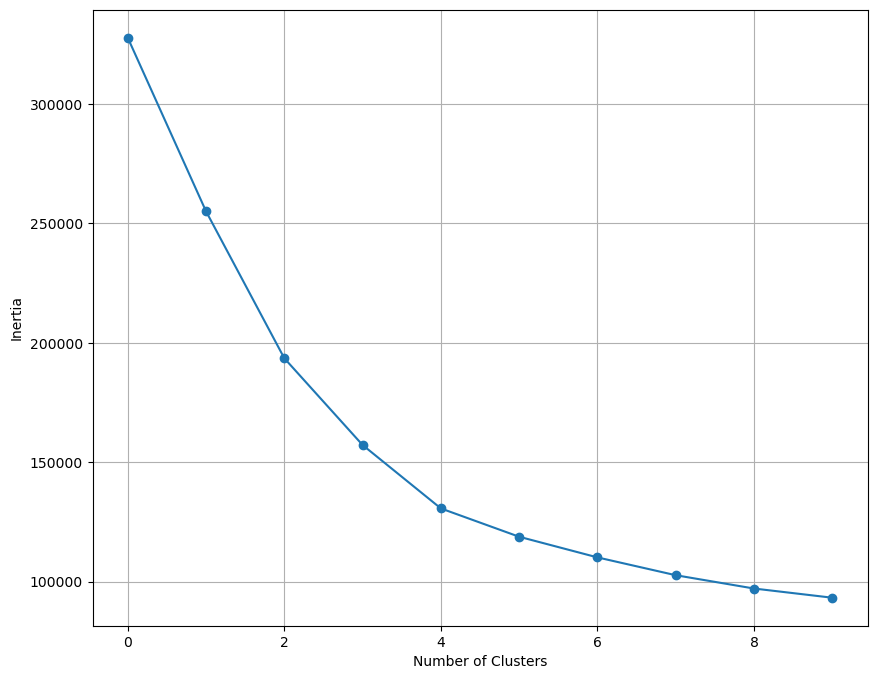

In [680]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit_predict(pdf.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

**Based on the Elbow Graph above, the optimal number of clusters would be 4 clusters**

### Fitting Model - KMeans

In [681]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(pdf)

array([3, 3, 3, ..., 0, 2, 1])

In [682]:
pdf['labels'] = kmeans.labels_

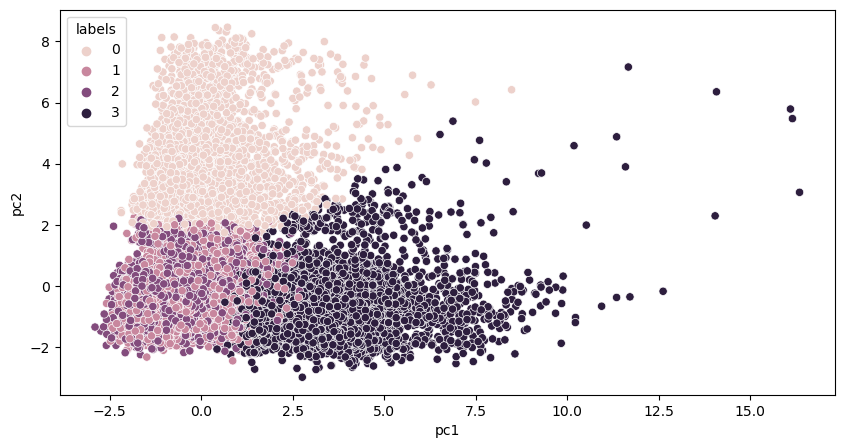

In [683]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=pdf, x='pc1', y='pc2', hue='labels')
plt.show()

# Evaluate Model

Silhouette average score for k=2:  0.44648316834169266
Silhouette average score for k=3:  0.4691352389205824
Silhouette average score for k=4:  0.3175501510046185
Silhouette average score for k=5:  0.33643222480326224
Silhouette average score for k=6:  0.2720439079998707


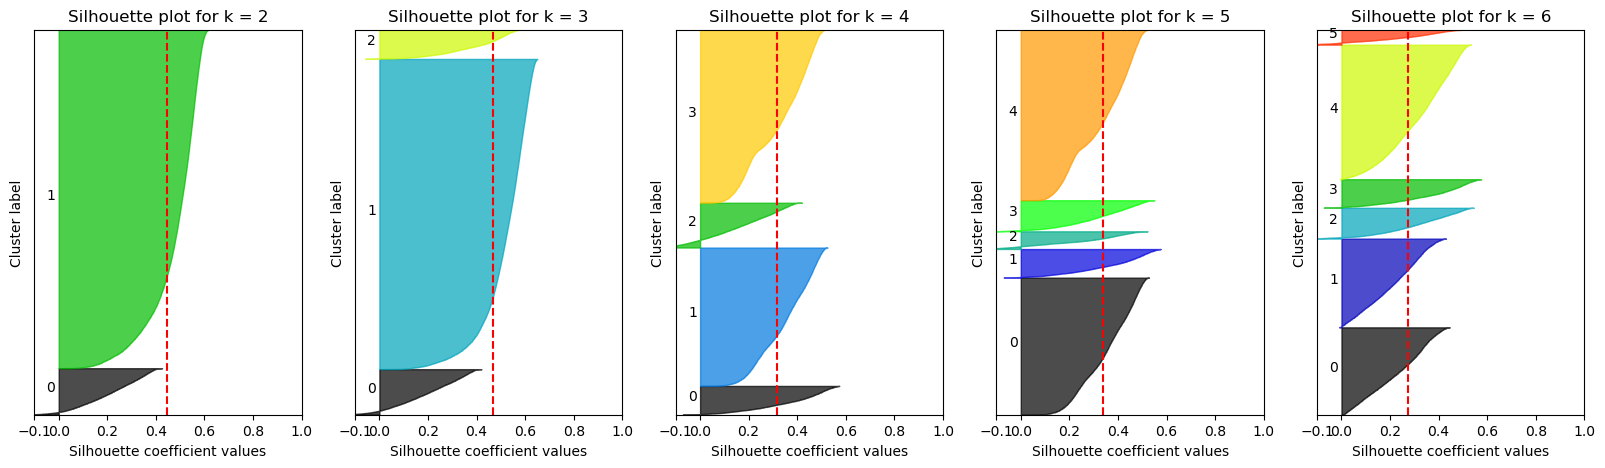

In [684]:
from sklearn.metrics import silhouette_score

# define range of k values
k_values = range(2, 7)

# create subplots
fig, axs = plt.subplots(1, len(k_values), figsize=(20, 5))

# iterate over each k value
for i, k in enumerate(k_values):
    # fit k-means model
    kmeans_eval = KMeans(n_clusters=k, random_state=42)
    # labels = kmeans_eval.labels_
    labels = kmeans_eval.fit_predict(pdf)

    # calculate silhouette score
    silhouette_avg = silhouette_score(pdf, labels)

    # calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pdf, labels)

    print(f"Silhouette average score for k={k}: ", silhouette_avg)
    
    # plot silhouette plot
    y_lower = 10
    axs[i].set_xlim([-0.1, 1])
    axs[i].set_ylim([0, len(pdf) + (k + 1) * 10])
    axs[i].set_title('Silhouette plot for k = {}'.format(k))
    axs[i].set_xlabel('Silhouette coefficient values')
    axs[i].set_ylabel('Cluster label')

    for j in range(k):
        # aggregate silhouette scores for samples in cluster j
        ith_cluster_silhouette_values = sample_silhouette_values[labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.nipy_spectral(float(j) / k)
        axs[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0,
                              ith_cluster_silhouette_values,
                              facecolor=color,
                              edgecolor=color,
                              alpha=0.7)

        # label silhouette plots with their cluster numbers at the middle
        axs[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # compute new y_lower for next plot
        y_lower = y_upper + 10

    axs[i].axvline(x=silhouette_avg, color='red', linestyle='--')
    axs[i].set_yticks([])
    axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


# Business Insight

### Returning the PCA dataframe to original